In [51]:
import numpy as np

In [52]:
### Play with the code below by giving different arrays  
image = np.array([
    [10, 30, 50, 70],
    [20, 40, 60, 80],
    [30, 50, 70, 90],
    [40, 60, 80, 100]
], dtype=np.float32)

print("Original Image Matrix:")
print(image)

Original Image Matrix:
[[ 10.  30.  50.  70.]
 [ 20.  40.  60.  80.]
 [ 30.  50.  70.  90.]
 [ 40.  60.  80. 100.]]


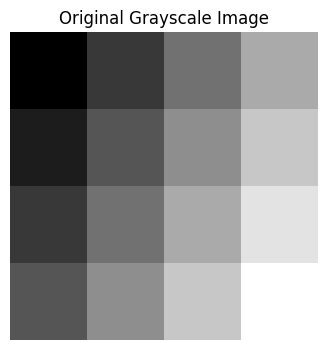

In [53]:
# Display the image visually
plt.figure(figsize=(4,4))
plt.imshow(image, cmap='gray', vmin=10, vmax=100)
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()

In [54]:
# Set the number of quantization levels
K = 3

In [55]:
# Determine the global min and max in the image.
min_val, max_val = image.min(), image.max()

In [56]:
# Initialize boundaries as evenly spaced points between min and max.
boundaries = np.linspace(min_val, max_val, K+1)  # e.g., [10, 40, 70, 100]
print("\nInitial Boundaries:", boundaries)


Initial Boundaries: [ 10.  40.  70. 100.]


In [57]:
# Initialize centroids as the midpoint of each interval.
centroids = np.array([(boundaries[i] + boundaries[i+1]) / 2 for i in range(K)])
print("Initial Centroids:", centroids)

Initial Centroids: [25. 55. 85.]


In [58]:
# Compute and print the frequency of each intensity in the image.
unique_values, counts = np.unique(image, return_counts=True)
print("\nPixel Intensity Counts:")
for value, count in zip(unique_values, counts):
    print(f"Intensity {value:.0f}: {count} pixels")


Pixel Intensity Counts:
Intensity 10: 1 pixels
Intensity 20: 1 pixels
Intensity 30: 2 pixels
Intensity 40: 2 pixels
Intensity 50: 2 pixels
Intensity 60: 2 pixels
Intensity 70: 2 pixels
Intensity 80: 2 pixels
Intensity 90: 1 pixels
Intensity 100: 1 pixels


In [59]:
# Detailed calculation of initial centroids
print("\nCalculation of Initial Centroids:")
for i in range(K):
    left = boundaries[i]
    right = boundaries[i+1]
    centroid = (left + right) / 2
    print(f"Interval {i+1}: ({left} + {right}) / 2 = {centroid}")


Calculation of Initial Centroids:
Interval 1: (10.0 + 40.0) / 2 = 25.0
Interval 2: (40.0 + 70.0) / 2 = 55.0
Interval 3: (70.0 + 100.0) / 2 = 85.0


In [60]:
def quantize_image(image, boundaries, centroids):
    """
    Given an image, boundaries, and centroids,
    assign each pixel to the centroid corresponding to the interval the pixel falls in.
    """
    quantized = np.zeros_like(image, dtype=np.float32)
    for i in range(K):
        # For clusters except the last, pixels equal to the right boundary are excluded.
        if i < K - 1:
            mask = (image >= boundaries[i]) & (image < boundaries[i+1])
        else:
            mask = (image >= boundaries[i]) & (image <= boundaries[i+1])
        quantized[mask] = centroids[i]
    return quantized

In [61]:
# Perform iterative quantization for 5 iterations.
iterations = 5

for it in range(iterations):
    # Step 1: Quantize the image with the current centroids and boundaries.
    quantized_image = quantize_image(image, boundaries, centroids)
    
    print(f"\nIteration {it+1} Quantized Image Matrix:")
    print(quantized_image)
    
    # Step 2: Update centroids.
    new_centroids = np.zeros_like(centroids)
    for i in range(K):
        # Define the mask for pixels in the i-th cluster.
        if i < K - 1:
            mask = (image >= boundaries[i]) & (image < boundaries[i+1])
        else:
            mask = (image >= boundaries[i]) & (image <= boundaries[i+1])
        if np.sum(mask) > 0:
            new_centroids[i] = np.mean(image[mask])
        else:
            new_centroids[i] = centroids[i]  # If no pixel falls in the cluster, keep the old value.
    
    # Step 3: Update boundaries.
    new_boundaries = boundaries.copy()
    for i in range(1, K):
        new_boundaries[i] = (new_centroids[i-1] + new_centroids[i]) / 2
    
    # Print updated centroids and boundaries for this iteration.
    print("Updated Centroids:", new_centroids)
    print("Updated Boundaries:", new_boundaries)
    
    # Update centroids and boundaries for the next iteration.
    centroids = new_centroids
    boundaries = new_boundaries


Iteration 1 Quantized Image Matrix:
[[25. 25. 55. 85.]
 [25. 55. 55. 85.]
 [25. 55. 85. 85.]
 [55. 55. 85. 85.]]
Updated Centroids: [22.5        50.         81.66666412]
Updated Boundaries: [ 10.          36.25        65.83333206 100.        ]

Iteration 2 Quantized Image Matrix:
[[22.5      22.5      50.       81.666664]
 [22.5      50.       50.       81.666664]
 [22.5      50.       81.666664 81.666664]
 [50.       50.       81.666664 81.666664]]
Updated Centroids: [22.5        50.         81.66666412]
Updated Boundaries: [ 10.          36.25        65.83333206 100.        ]

Iteration 3 Quantized Image Matrix:
[[22.5      22.5      50.       81.666664]
 [22.5      50.       50.       81.666664]
 [22.5      50.       81.666664 81.666664]
 [50.       50.       81.666664 81.666664]]
Updated Centroids: [22.5        50.         81.66666412]
Updated Boundaries: [ 10.          36.25        65.83333206 100.        ]

Iteration 4 Quantized Image Matrix:
[[22.5      22.5      50.       81.6